In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HomeWork.csv').drop('Unnamed: 0', axis=1)

In [3]:
display(df.info(), df.describe(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   status  490 non-null    object 
 1   income  430 non-null    float64
 2   age     441 non-null    float64
 3   date    500 non-null    object 
dtypes: float64(2), object(2)
memory usage: 15.8+ KB


None

,income,age
count,430.000000,441.000000
mean,152020.623256,46.362812
std,242647.036978,25.036517
min,-13745.000000,0.000000
25%,2000.000000,23.000000
50%,21000.000000,44.000000
75%,217000.000000,68.000000
max,992000.000000,99.000000


,status,income,age,date
0,Student,4000.0,18.0,2022-01-23
1,Pensioner,NaN,91.0,2022-01-19
2,Student,4000.0,18.0,2022-01-03
3,Student,0.0,NaN,2022-01-13
4,Pensioner,5000.0,87.0,2022-01-31


In [4]:
df.head(30)

,status,income,age,date
0,Student,4000.0,18.0,2022-01-23
1,Pensioner,NaN,91.0,2022-01-19
2,Student,4000.0,18.0,2022-01-03
3,Student,0.0,NaN,2022-01-13
4,Pensioner,5000.0,87.0,2022-01-31
5,Student,1000.0,20.0,2022-01-25
6,Student,2000.0,22.0,2022-01-14
7,Businessman,658000.0,73.0,2022-01-14
8,Pensioner,NaN,92.0,2022-01-05
9,Working,52000.0,44.0,2022-01-19


## Столбец "status"

Посмотрим уникальные значения

In [5]:
df.status.unique()

array(['Student', 'Pensioner', 'Businessman', 'Working', nan],
      dtype=object)

Удалим строки с пропущенными значениями.

- Мы могли бы вручную проставить значения, основываясь на полях "age" и "income", но на практике (на большом объеме данных) - это было бы невыполнимо.

In [6]:
df.dropna(subset=['status'], inplace=True)

## Столбец "income"

В данных в столбце "Доход" были замечены следующие проблемы:
- Негативные значения дохода
- Пропущенные значения
- Очень большие значения дохода

Посмотрим на данные поближе.

#### Гистограммы дохода

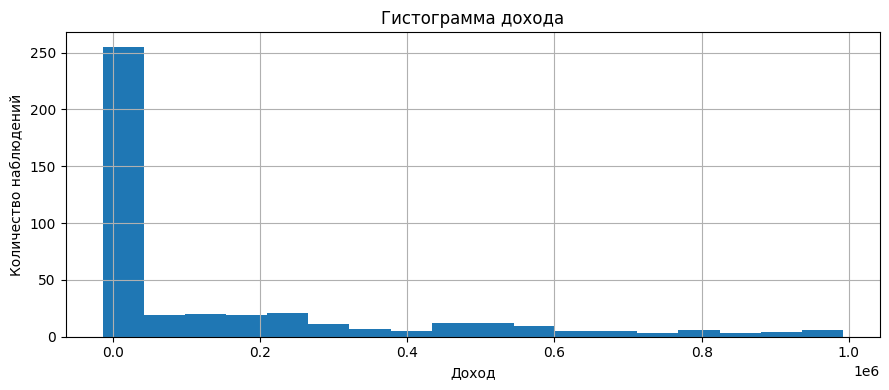

In [7]:
df.income.hist(bins='auto', figsize=(9,4))
plt.title('Гистограмма дохода')
plt.xlabel('Доход')
plt.ylabel('Количество наблюдений')
plt.tight_layout()

Изначально может показаться что у нас очень большое количество выбросов, но так как у нас данные по разным группам людей и внутри групп распределение значений дохода может быть разным - посмотрим:
- Гистограммы дохода по группам,
- "Ящики с усами" дохода по группам.

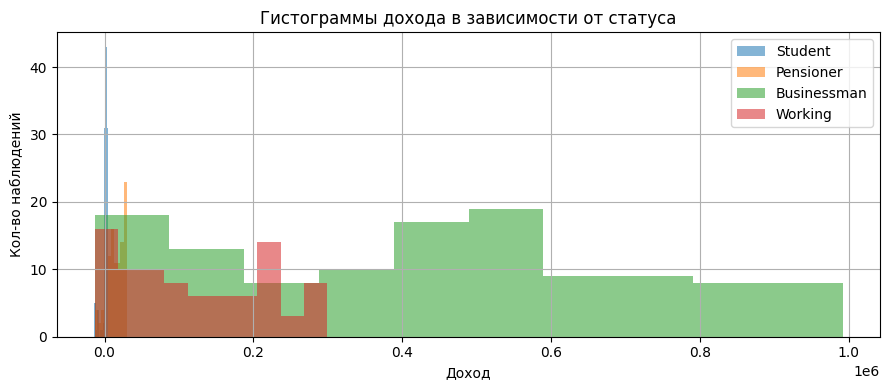

In [8]:
plt.figure(figsize=(9,4))
for status in df.status.unique():
    df[df.status == status].income.hist(alpha=0.55, label=status)

plt.xlabel('Доход')
plt.ylabel('Кол-во наблюдений')
plt.title('Гистограммы дохода в зависимости от статуса')
plt.legend()

plt.tight_layout()
plt.show();

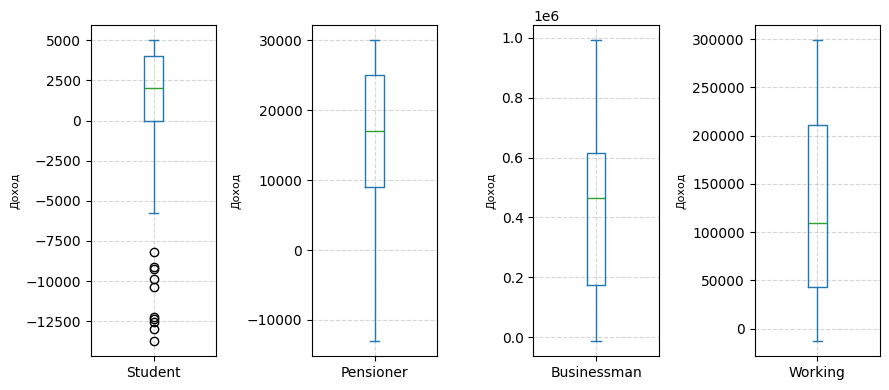

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(9,4))

for i, status in enumerate(df.status.dropna().unique()): 
    df[df.status==status].income.plot(kind='box', label=status, ax=ax[i])
    ax[i].grid(True, ls='--', alpha=0.5)
    ax[i].set_ylabel('Доход', size=8)
    
plt.tight_layout()
plt.show();

Как мы видим из "ящика с усами", выбросы дохода имеются только у людей из категории "Student". Так же, эти выбросы являются отрицательными значениями. К тому же, отрицательные значения дохода присутствуют во всех категориях "status".

- Заменим отрицательные значения дохода на медианное значение дохода для данной категории.

In [10]:
for status in df.status.dropna().unique():
    condition = (df.income < 0) & (df.status == status)
    df.loc[condition, 'income'] = df[df.status == status].income.median()

Проверим, остались ли выбросы, после замены отрицательных значений на медиану:

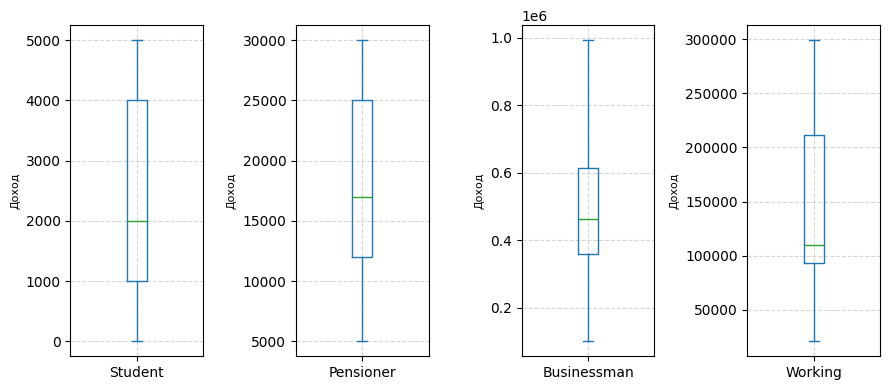

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(9,4))

for i, status in enumerate(df.status.dropna().unique()): 
    df[df.status==status].income.plot(kind='box', label=status, ax=ax[i])
    ax[i].grid(True, ls='--', alpha=0.5)
    ax[i].set_ylabel('Доход', size=8)
    
plt.tight_layout()
plt.show();

Успех. Выбросы обработаны.

Осталось решить как обрабатывать пропущенные значения, которых в столбце 'income' 70/500.

- Удалить: удаление пропусков приведет к потере более 10% данных
- Заполнить средним или медианой: может быть актуально для категорий "student", "pensioner" и "working". У категории "businessman" доход может очень различаться.

In [12]:
# Посмотрим, сколько пропусков в категории "businessman"
df[df.status=='Businessman'].income.isna().sum()

16

In [13]:
# Заполним медианой пропуски у всех кроме категории "Businessman"
df.loc[((df.status == 'Student') & (df.income.isna())), 'income'] = df[df.status == 'Student'].income.median()
df.loc[((df.status == 'Pensioner') & (df.income.isna())), 'income'] = df[df.status == 'Pensioner'].income.median()
df.loc[((df.status == 'Working') & (df.income.isna())), 'income'] = df[df.status == 'Working'].income.median()

# Удалим строки с пропущенными значениями у категории "Businessman"
df.drop(df[(df.status == 'Businessman') & (df.income.isna())].index, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   status  474 non-null    object 
 1   income  474 non-null    float64
 2   age     419 non-null    float64
 3   date    474 non-null    object 
dtypes: float64(2), object(2)
memory usage: 18.5+ KB


## Столбец "age"

Изначальноо может показаться что у анс очень большое количество выбросов. но так как у нас данные по разным категориям людей и внутри групп распределение значений дохода может быть разным - посмотрим ящики с усами по каждой категории столбца `status`

In [14]:
df.age.describe()

count    419.000000
mean      46.090692
std       25.142111
min        0.000000
25%       23.000000
50%       43.000000
75%       68.000000
max       99.000000
Name: age, dtype: float64

In [15]:
df.age.isna().sum()

55

- Присутствуют аномальные значения: 0 и 99 лет.
- 55 пропусков

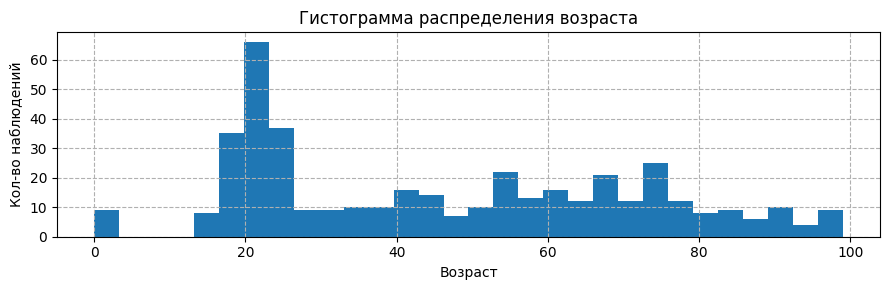

In [16]:
df.age.hist(bins=30, figsize=(9,3))
plt.title('Гистограмма распределения возраста')
plt.xlabel('Возраст')
plt.ylabel('Кол-во наблюдений')
plt.grid(True, ls='--')
plt.tight_layout();

Здесь, дело может быть в том, что некоторые люди не хотят озвучивать свой возраст и вместо этого ставят либо 0, либо не заполняют данное поле.

Как мы увидели выше, в строках, в которых отсутствуют значения в столбце "age", реальная информация. Удалять данные строки и заполнять средним - кажется не самым лучшим решением.

Заполним их числом "26": максимальным значением возраста для студентов.   
- Теоритически, люди в 26 лет могут уже быть и "working" и "businessman" или еще оставаться "student".

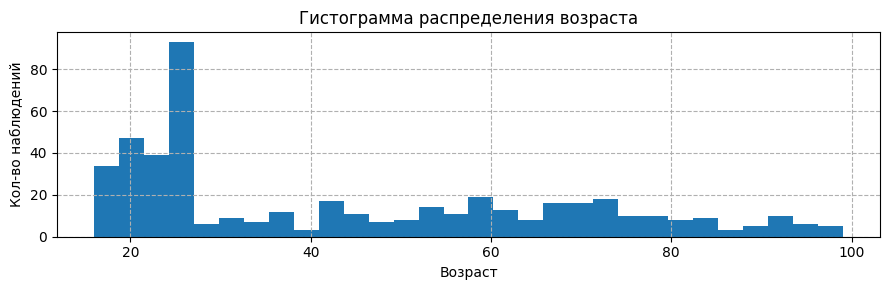

In [17]:
df.loc[(df['age'] == 0) | (df['age'].isna()), 'age'] = 26

df.age.hist(bins=30, figsize=(9,3))
plt.title('Гистограмма распределения возраста')
plt.xlabel('Возраст')
plt.ylabel('Кол-во наблюдений')
plt.grid(True, ls='--')
plt.tight_layout();

## Data Types

Приведём типы данных в оптимальный формат

In [18]:
# Столбец с датой
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Числовые столбцы
df['age'] = df['age'].astype('int16')
df['income'] = df['income'].astype('int32')

## Итог

In [19]:
# Сбросим индексы в финальном датафрейме
df = df.reset_index()

In [20]:
display(df.info(), df.describe(), df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   474 non-null    int64         
 1   status  474 non-null    object        
 2   income  474 non-null    int32         
 3   age     474 non-null    int16         
 4   date    474 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(1), int64(1), object(1)
memory usage: 14.0+ KB


None

,index,income,age,date
count,474.000000,474.000000,474.000000,474
mean,250.647679,160630.801688,44.253165,2022-01-16 03:29:37.215190016
min,0.000000,0.000000,16.000000,2022-01-01 00:00:00
25%,126.250000,4000.000000,24.000000,2022-01-08 06:00:00
50%,250.500000,25500.000000,36.000000,2022-01-16 00:00:00
75%,374.750000,221250.000000,65.000000,2022-01-24 00:00:00
max,499.000000,992000.000000,99.000000,2022-02-01 00:00:00
std,144.818733,236726.961080,23.862787,NaN


,index,status,income,age,date
0,0,Student,4000,18,2022-01-23
1,1,Pensioner,17000,91,2022-01-19
2,2,Student,4000,18,2022-01-03
3,3,Student,0,26,2022-01-13
4,4,Pensioner,5000,87,2022-01-31
...,...,...,...,...,...
469,495,Pensioner,28000,26,2022-01-30
470,496,Pensioner,16000,64,2022-01-20
471,497,Businessman,258000,43,2022-01-12
472,498,Student,4000,17,2022-01-19


### Распределение значений среднего дохода по дням

In [21]:
date_grouped = df.groupby('date', as_index=False).income.agg(['count', 'mean'])
date_grouped_bsns = df[df.status=='Businessman'].groupby('date', as_index=False).income.agg(['count', 'mean'])
date_grouped_pnsn = df[df.status=='Pensioner'].groupby('date', as_index=False).income.agg(['count', 'mean'])
date_grouped_stud = df[df.status=='Student'].groupby('date', as_index=False).income.agg(['count', 'mean'])
date_grouped_work = df[df.status=='Working'].groupby('date', as_index=False).income.agg(['count', 'mean'])

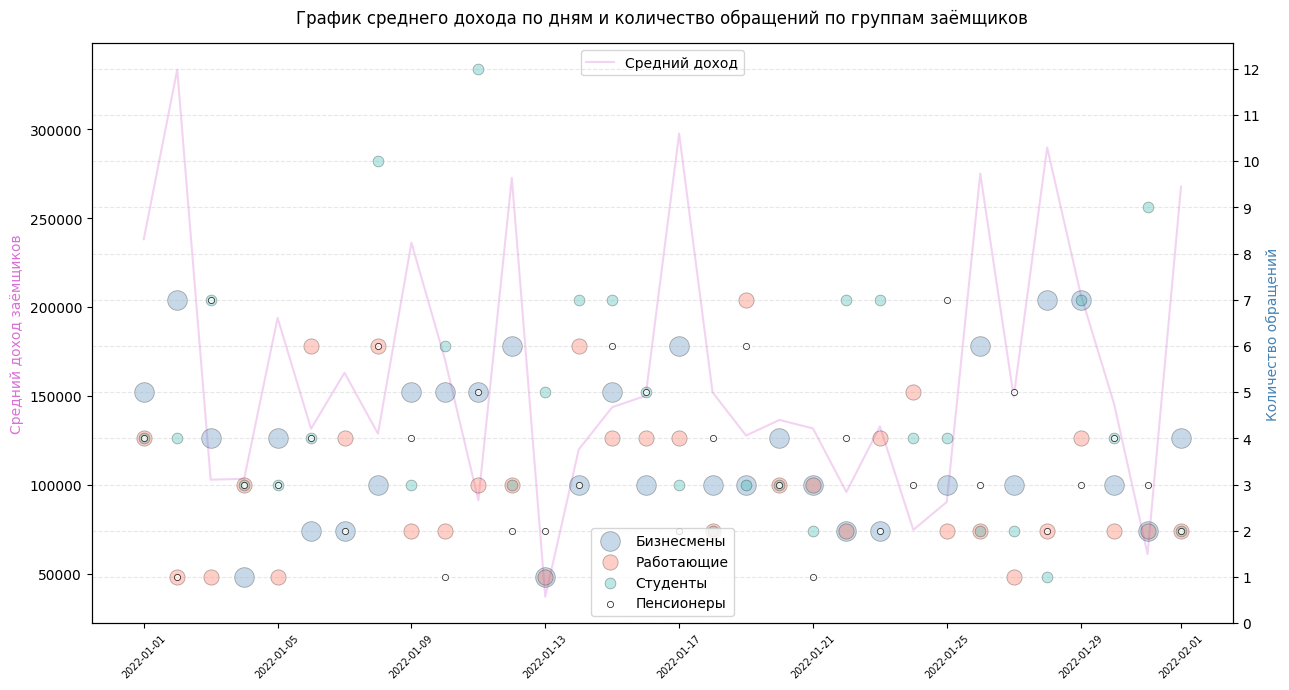

In [22]:
fig, ax1 = plt.subplots(figsize=(13, 7))

ax1.plot(date_grouped['date'], date_grouped['mean'],c='orchid', alpha=0.3, label='Средний доход')
ax1.set_ylabel('Средний доход заёмщиков',c='orchid')
ax1.tick_params(axis='x', rotation=45, labelsize=7)

ax2 = ax1.twinx()
ax2.scatter(date_grouped_bsns['date'], date_grouped_bsns['count'], \
            alpha=0.3, s=200, label='Бизнесмены', edgecolor='black', facecolor='steelblue', linewidth=0.6)
ax2.scatter(date_grouped_work['date'], date_grouped_work['count'], \
            alpha=0.3, s=120, label='Работающие', edgecolor='black', facecolor='tomato', linewidth=0.6) 
ax2.scatter(date_grouped_stud['date'], date_grouped_stud['count'], \
            alpha=0.3, s=60, label='Студенты', edgecolor='black', facecolor='lightseagreen', linewidth=0.6)
ax2.scatter(date_grouped_pnsn['date'], date_grouped_pnsn['count'], \
            alpha=0.8, s=20, label='Пенсионеры', edgecolor='black', facecolor='white', linewidth=0.6)

ax2.set_ylabel('Количество обращений',c='steelblue')
ax2.set_yticks(range(13))
ax2.grid(True, ls='--', alpha=0.3)

ax1.legend(loc='upper center')
ax2.legend(loc='lower center')
plt.title('График среднего дохода по дням и количество обращений по группам заёмщиков', y=1.02)

plt.tight_layout()
plt.show()

Чаще всего, наибольшие значения среднего дохода достигаются в дни с наибольшим количеством обращений людей из категории "Businessman".

### Распределение заёмщиков по статусам

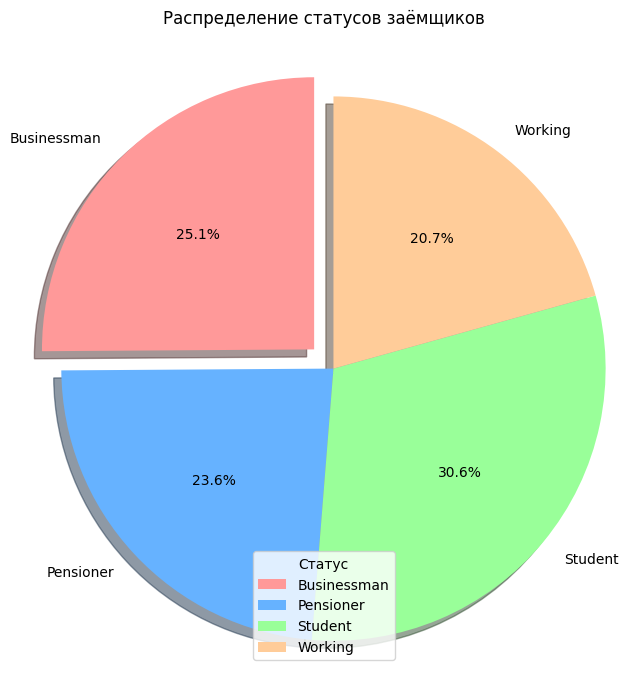

In [23]:
data = df.groupby('status').income.count()
labels = data.index

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
explode = (0.1, 0, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Распределение статусов заёмщиков', pad=20)
plt.legend(title='Статус', labels=labels, loc='lower center')
plt.axis('equal')

plt.show()

- Заёмщики со статусом "Businessman" составляют четверть от всего количества заёмщиков.
- Самая большая группа заёмщиков - "Student": 30.6%

### Общее количество обращений по дням недели

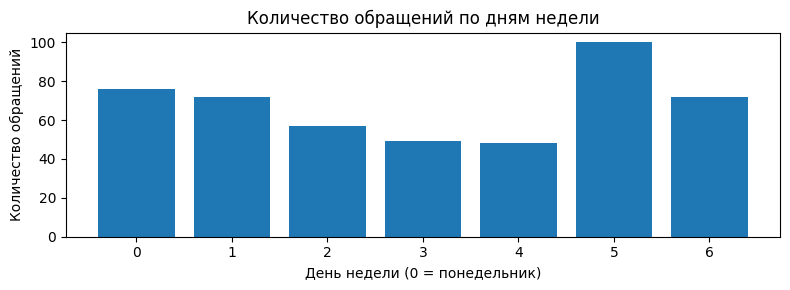

In [24]:
df['dow'] = df['date'].dt.weekday

dow_grouped = df.groupby('dow', as_index=False).income.agg('count').rename(columns={'income':'cnt_daily'})
dow_grouped.sort_values(by='dow', inplace=True)

plt.figure(figsize=(8,3))
plt.bar(dow_grouped.dow, dow_grouped.cnt_daily)
plt.xlabel('День недели (0 = понедельник)')
plt.ylabel('Количество обращений')
plt.title('Количество обращений по дням недели')
plt.tight_layout()
plt.show()

Наибольшее количество обращений происходит в субботу. Наименьшее - в четверг и пятницу.

### Количество обращений по дням недели по группам

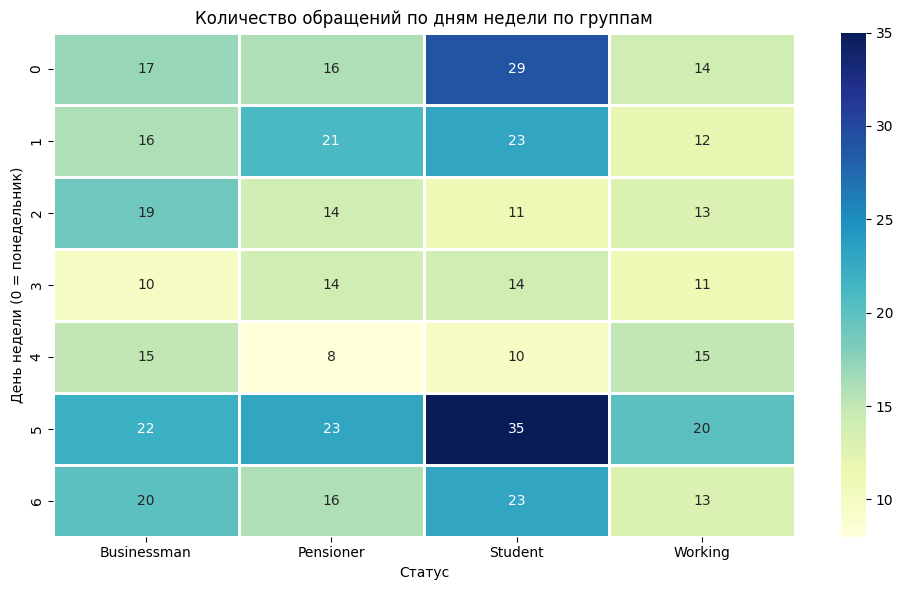

In [25]:
heatmap_data = df.pivot_table(index='dow', columns='status', values='income', aggfunc='count')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar=True, linewidths=0.75)
plt.xlabel('Статус')
plt.ylabel('День недели (0 = понедельник)')
plt.title('Количество обращений по дням недели по группам')

plt.tight_layout()
plt.show()

- Студенты - самая активная группа.
- Работающие люди активны преимущественно по субботам.

### 95% Доверительный Интервал для оценки истинного среднего значения дохода по группам заёмщиков.
Для определения доверительного интервала воспользуемся методом Bootstrap и визуализируем результат.

In [26]:
boot_means_bsns = []
boot_means_work = [] 
boot_means_pens = []
boot_means_stud = []
boot_means_list = [boot_means_bsns, boot_means_work ,boot_means_pens, boot_means_stud]
statuses = ['Businessman', 'Working', 'Pensioner', 'Student']

for i in range(10_000):
    for means_list, status in zip(boot_means_list, statuses):
        
        boot_mean = np.mean(np.random.choice(df[df.status==status].income.values, 
                                             size=len(df[df.status==status].income.values), 
                                             replace=True))
        means_list.append(boot_mean.round(2))
    

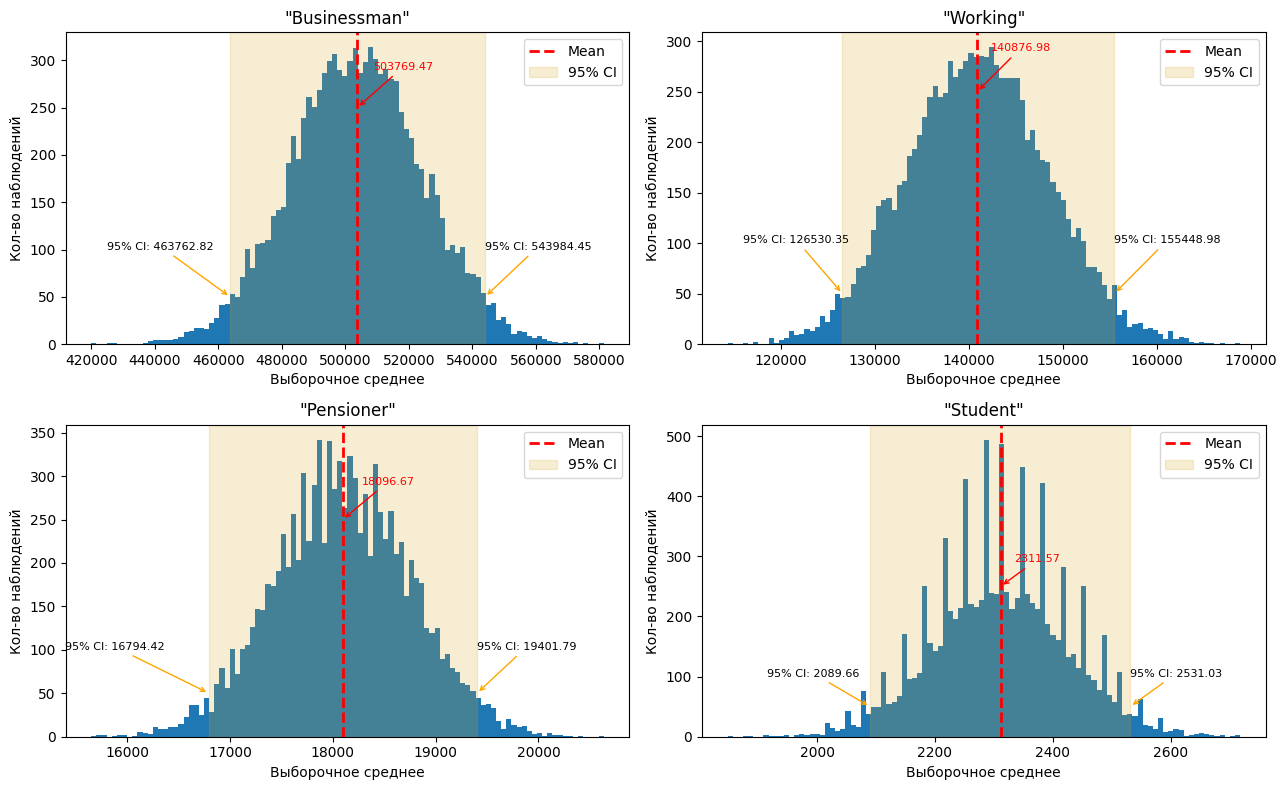

In [27]:
def confidence_interval(data, interval):
    lower_ci = np.percentile(data, (100-interval) / 2)
    upper_ci = np.percentile(data, interval + (100-interval) / 2)
    return lower_ci, upper_ci

interval = 95

fig, axs = plt.subplots(2, 2, figsize=(13, 8))
for i, ax in enumerate(axs.ravel()):
    if i < len(boot_means_list):
        data = boot_means_list[i]
        ax.hist(data, bins=int(np.sqrt(len(data))))
    
        mean = np.mean(data)
        lower, upper = confidence_interval(data, interval)
        ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
        ax.axvspan(lower, upper, alpha=0.2, color='goldenrod', label=f'{interval}% CI')
        
        ax.set_title(f'"{statuses[i]}"')
        ax.set_xlabel('Выборочное среднее')
        ax.set_ylabel('Кол-во наблюдений')
        ax.legend()

        ax.annotate(f'{mean:.2f}', xy=(mean, 250), xytext=(mean+mean/100, 290),
                    arrowprops=dict(arrowstyle='->', lw=1, color='red'),
                    color='red', fontsize=8)
        ax.annotate(f'{interval}% CI: {lower:.2f}', xy=(lower, 50), xytext=(lower-lower/12, 100),
                    arrowprops=dict(arrowstyle='->', lw=1, color='orange'),
                    color='black', fontsize=8)
        ax.annotate(f'{interval}% CI: {upper:.2f}', xy=(upper, 50), xytext=(upper, 100),
                    arrowprops=dict(arrowstyle='->', lw=1, color='orange'),
                    color='black', fontsize=8)


plt.tight_layout()
plt.show()

95% доверительные интервалы для истинного среднего дохода по группам:

- **"Businessman"**: (463906, 544235)
- **"Working"**: (126612, 155796)
- **"Pensioner"**: (16776, 19366)
- **"Student"**: (2090, 2531)

Это значит, что мы на 95% уверены что истинное значение среднего дохода генеральной совокупности по каждой группе находится в пределах данных значений.